optimal residuum: 0.0022374216294283687
optimal length:  15
residuum2:  0.002394592653080423 residuum3:  0.0021893264163148165
3
       2
0.179 x - 0.8473 x + 0.9881
          3          2
-0.08233 x + 0.6533 x - 1.703 x + 1.466


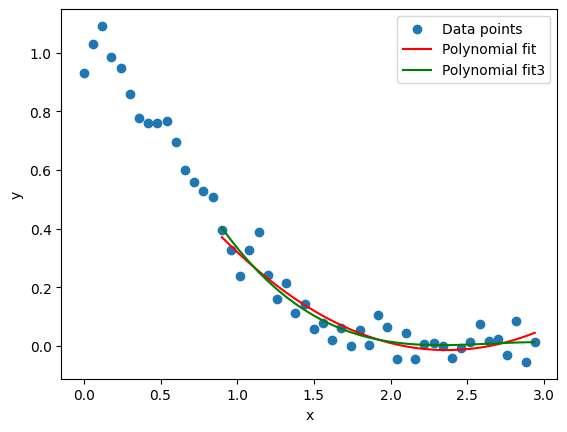

In [1]:
import numpy as np
import math
import random as rand
import scipy
import matplotlib.pyplot as plt

# Sample data
# rng = np.random.default_rng()
# x = np.linspace(-3, 3, 50)
# y = np.exp(-x**2) + 0.1 * rng.standard_normal(50)



xlimits = 0, 3
xcount = 50
x = [xlimits[0] + i * (xlimits[1] - xlimits[0]) / xcount for i in range(xcount)]
y = [math.exp(-xx**2) + 0.05 * rand.gauss(0, 1) for xx in x]
# y = [xx**4 + 0.1 * rand.gauss(0, 1) for xx in x]


# Fit a polynomial of degree 2 (quadratic)
FROM = 15
TILL = 50

x_sub = x[FROM:TILL]
y_sub = y[FROM:TILL]
coefficients, residuals, rank, singular_values, rcond = np.polyfit(x_sub, y_sub, 2, full=True)
coefficients3, residuals3, rank3, singular_values3, rcond3 = np.polyfit(x_sub, y_sub, 3, full=True)
# print(coefficients)
# print(coefficients3)

def f(u):
    # global FROM
    u = int(u)
    x = x_sub[0:u]
    y = y_sub[0:u]
    # import pdb; pdb.set_trace()
    coefficients, residuals, rank, singular_values, rcond = np.polyfit(x, y, 2, full=True)
    return residuals[0] / u

res = scipy.optimize.minimize_scalar(f, bounds=(5, len(x_sub)), method='bounded')
print("optimal residuum:", res.fun)
print("optimal length: ", round(res.x))


print("residuum2: ", residuals[0] / (TILL - FROM), "residuum3: ", residuals3[0] / (TILL - FROM))
print(rank)


# Generate polynomial function
polynomial = np.poly1d(coefficients)
print(polynomial)
polynomial3 = np.poly1d(coefficients3)
print(polynomial3)

# Generate values for plotting
x_fit = x_sub
y_fit = polynomial(x_fit)
y_fit3 = polynomial3(x_fit)


# Plot data and polynomial fit
plt.scatter(x, y, label='Data points')
plt.plot(x_fit, y_fit, label='Polynomial fit', color='red')
plt.plot(x_fit, y_fit3, label='Polynomial fit3', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()